**GRUPO 7**

Beatriz Herguedas Pinedo

Pablo Hernández Aguado

# Toma de contacto.

En este apartado ejecutamos el siguiente archivo .clp:

In [1]:
(defrule nombreJuan
    (nombre Juan)
=>
    (printout t "Tu nombre de pila es Juan" crlf)
)

(defrule Hola
    (nombre Juan)
    (apellido-1 Perez)
    (apellido-2 Lopez)
=>
    (printout t "Hola Juan Perez Lopez" crlf)
)

(deffacts Hechos
    (nombre Ana)
    (nombre Juan)
    (apellido-1 Diaz)
    (apellido-1 Perez)
    (apellido-2 Lopez)
    (apellido-1 Martinez)
)

SyntaxError: invalid syntax (<ipython-input-1-5f990aabca25>, line 1)

A continuación, respondemos a las preguntas planteadas.

_**¿Se ha activado alguna regla*? ¿En qué orden se han activado?**_

Sí, se han activado ambas reglas una vez se han declarado los hechos que las activan.
En concreto, tras hacer `(assert (nombre Juan))` se ha activado la norma `nombreJuan`.
Y, posteriormente, tras hacer `(assert (apellido-1 Perez) (apellido-2 Lopez))`, se ha activado la norma `Hola`.

_**Para comenzar la ejecución hay que escribir `(run)` o usar la opción `run` del menú. ¿Qué reglas se han ejecutado? ¿En qué orden lo han hecho? ¿Por qué crees que se han ejecutado en ese orden?**_

Se han ejecutado tanto 'Hola' como 'nombreJuan', en ese orden. Ha ocurrido así porque se ejecutan las reglas activas en orden alfanumérico. (h < n).

_**Reiniciar el sistema con `(reset)`. ¿Qué hubiera pasado si reiniciamos con `(clear)` en su lugar?**_

Al hacer (clear), se elimina todo lo que se ha definido en la
sesión de trabajo, tanto lo introducido por línea de comandos
como lo cargado desde un fichero.

Con (reset), sin embargo, sólo se elimina lo introducido por
línea de comandos, mientras que la información de los ficheros
cargados se conserva.

_Tras cargar un fichero con (load) hay que ejecutar (reset)
para que se instancien sus hechos._

# Archivo 'familia.clp'.

_**Dado el archivo `familia.clp`, modificarlo para añadir las reglas que añaden todos los hechos `(primos p1 p2)` que indica que `p1(h o m)` es primo hermano de `p2(h o m)`.**_

El archivo `familia.clp` queda así:

In [ ]:
(deffacts inicio
    (dd juan maria rosa m)
    (dd juan maria luis h)
    (dd jose laura pilar m)
    (dd luis pilar miguel h)
    (dd miguel isabel jaime h)
    (dd pedro rosa pablo h)
    (dd pedro rosa begoña m))

;(dd Juan María Rosa m) indica que Juan y María son los padres de Rosa y que Rosa es una mujer. 

(defrule padre
    (dd ?x ? ?y ?)
    =>
    (assert (padre ?x ?y)))

(defrule madre
    (dd ? ?x ?y ?)
    =>
    (assert (madre ?x ?y)))

(defrule hijoPorPadre
    (dd ?x ? ?y h)
    =>
    (assert(hijo ?y ?x)))

(defrule hijoPorMadre
    (dd ? ?x ?y h)
    =>
    (assert(hijo ?y ?x)))

(defrule hijaPorPadre
    (dd ?x ? ?y m)
    =>
    (assert(hija ?y ?x)))

(defrule hijaPorMadre
    (dd ? ?x ?y m)
    =>
    (assert(hija ?y ?x)))

(defrule hermano
    (dd ?p ?m ?h1 ?)
    (dd ?p ?m ?h2 h)
    (test (neq ?h1 ?h2))
    =>
    (assert (hermano ?h2 ?h1)))

(defrule hermana
    (dd ?p ?m ?h1 ?)
    (dd ?p ?m ?h2 m)
    (test (neq ?h1 ?h2))
    =>
    (assert (hermana ?h2 ?h1)))

(defrule abueloPorPadre
	(padre ?a ?p)
    (padre ?p ?h)
	=>
	(assert (abuelo ?a ?h)))

(defrule abueloPorMadre
	(padre ?a ?m)
	(madre ?m ?h)
	=>
	(assert (abuelo ?a ?h)))

(defrule abuelaPorPadre
	(madre ?a ?p)
    (padre ?p ?h)
	=>
	(assert (abuela ?a ?h)))

(defrule abuelaPorMadre
	(madre ?a ?m)
    (madre ?m ?h)
	=>
	(assert (abuela ?a ?h)))

(defrule ascendientePadre
    (padre ?x ?y)
    =>
    (assert(ascendiente ?x ?y)))
    
(defrule ascendienteMadre
    (madre ?x ?y)
    =>
    (assert(ascendiente ?x ?y)))

(defrule ascendienteRec
    (ascendiente ?x ?y)
    (ascendiente ?y ?z)
    =>
    (assert(ascendiente ?x ?z)))

; Aquí la parte añadida:
	
(defrule primosHH
    (padre ?h1 ?p1)
    (padre ?h2 ?p2)
    (hermano ?h1 ?h2)
    =>
    (assert(primos ?p1 ?p2)))

(defrule primosHM
    (padre ?h1 ?p1)
    (madre ?h2 ?p2)
    (hermano ?h1 ?h2)
    =>
    (assert(primos ?p1 ?p2)))

(defrule primosMH
    (madre ?h1 ?p1)
    (padre ?h2 ?p2)
    (hermana ?h1 ?h2)
    =>
    (assert(primos ?p1 ?p2)))

(defrule primosMM
    (madre ?h1 ?p1)
    (madre ?h2 ?p2)
    (hermana ?h1 ?h2)
    =>
    (assert(primos ?p1 ?p2)))

(defrule sonPrimos
    (primos ?p1 ?p2)
    =>
    (printout t ?p1 " y " ?p2 " son primos." crlf))


Y la ejecución de este archivo nos da la siguiente lista de hechos (en la que los nuevos hechos `primos` se han señalado con `>>`:

In [ ]:
f-0     (initial-fact)
f-1     (dd juan maria rosa m)
f-2     (dd juan maria luis h)
f-3     (dd jose laura pilar m)
f-4     (dd luis pilar miguel h)
f-5     (dd miguel isabel jaime h)
f-6     (dd pedro rosa pablo h)
f-7     (dd pedro rosa begoÃ±a m)
f-8     (padre pedro begoÃ±a)
f-9     (ascendiente pedro begoÃ±a)
f-10    (madre rosa begoÃ±a)
f-11    (ascendiente rosa begoÃ±a)
f-12    (hermano pablo begoÃ±a)
f-13    (hija begoÃ±a pedro)
f-14    (hija begoÃ±a rosa)
f-15    (hermana begoÃ±a pablo)
f-16    (padre pedro pablo)
f-17    (ascendiente pedro pablo)
f-18    (madre rosa pablo)
f-19    (ascendiente rosa pablo)
f-20    (hijo pablo pedro)
f-21    (hijo pablo rosa)
f-22    (padre miguel jaime)
f-23    (ascendiente miguel jaime)
f-24    (madre isabel jaime)
f-25    (ascendiente isabel jaime)
f-26    (hijo jaime miguel)
f-27    (hijo jaime isabel)
f-28    (padre luis miguel)
f-29    (abuelo luis jaime)
f-30    (ascendiente luis miguel)
f-31    (ascendiente luis jaime)
f-32    (madre pilar miguel)
f-33    (abuela pilar jaime)
f-34    (ascendiente pilar miguel)
f-35    (ascendiente pilar jaime)
f-36    (hijo miguel luis)
f-37    (hijo miguel pilar)
f-38    (padre jose pilar)
f-39    (abuelo jose miguel)
f-40    (ascendiente jose pilar)
f-41    (ascendiente jose jaime)
f-42    (ascendiente jose miguel)
f-43    (madre laura pilar)
f-44    (abuela laura miguel)
f-45    (ascendiente laura pilar)
f-46    (ascendiente laura jaime)
f-47    (ascendiente laura miguel)
f-48    (hija pilar jose)
f-49    (hija pilar laura)
f-50    (padre juan luis)
f-51    (abuelo juan miguel)
f-52    (ascendiente juan luis)
f-53    (ascendiente juan jaime)
f-54    (ascendiente juan miguel)
f-55    (madre maria luis)
f-56    (abuela maria miguel)
f-57    (ascendiente maria luis)
f-58    (ascendiente maria jaime)
f-59    (ascendiente maria miguel)
f-60    (hermana rosa luis)
>>f-61    (primos pablo miguel)
>>f-62    (primos begoÃ±a miguel)
f-63    (hijo luis juan)
f-64    (hijo luis maria)
f-65    (hermano luis rosa)
>>f-66    (primos miguel begoÃ±a)
>>f-67    (primos miguel pablo)
f-68    (padre juan rosa)
f-69    (abuelo juan pablo)
f-70    (abuelo juan begoÃ±a)
f-71    (ascendiente juan rosa)
f-72    (ascendiente juan pablo)
f-73    (ascendiente juan begoÃ±a)
f-74    (madre maria rosa)
f-75    (abuela maria pablo)
f-76    (abuela maria begoÃ±a)
f-77    (ascendiente maria rosa)
f-78    (ascendiente maria pablo)
f-79    (ascendiente maria begoÃ±a)
f-80    (hija rosa juan)
f-81    (hija rosa maria)
For a total of 82 facts.

# Archivo 'ej6.clp'.

En el archivo dado `ej6.clp` se proporciona un sistema en Clips que da soporte a un servicio de
búsqueda de pareja. El sistema dispondrá de datos iniciales de distintas personas que estarán
establecidos como hechos. Por ejemplo, el nombre, el sexo, la edad y el tipo de pareja que
busca (hombre o mujer). Además, se dispone de datos sobre su número de amigos en
Facebook (si no tiene cuenta entonces valor 0) y sobre sus gustos (música, lectura, cine,
teatro).

_**Ejecuta el sistema, indica cuál es el fallo y corrigelo, vuelve a hacer las pruebas necesarias y
comenta los resultados.**_

Al ejecutar el archivo dado, este lo hace de forma indefinida, sin acabar nunca. El fallo se encontraba en que, al modificar el carácter de una persona, no comprobaba que ese carácter no estuviera ya definido. De esta forma, modificaba el carácter de la misma persona de forma ininterrumpida, entrando en un bucle infinito.

Basta entonces con añadir en las reglas del archivo que modifican el carácter:

`(test (eq ?c nil))`

Una vez resuelto el problema, el programa muestra la siguiente consecución de hechos:

In [4]:
f-0     (initial-fact)
f-7     (persona (nombre David) (sexo H) (edad 45) (tipoPareja M) (numAmigosFacebook 36) (gustos lectura) (caracter introvertido))
f-8     (afines David Juan)
f-9     (afines David Ana)
f-10    (persona (nombre Juan) (sexo H) (edad 24) (tipoPareja M) (numAmigosFacebook 36) (gustos lectura) (caracter introvertido))
f-11    (afines Juan Ana)
f-12    (persona (nombre Ana) (sexo M) (edad 29) (tipoPareja H) (numAmigosFacebook 15) (gustos lectura) (caracter introvertido))
f-13    (compatibles David Ana)
f-14    (compatibles Juan Ana)
f-15    (cita Juan Ana)
f-16    (persona (nombre Luis) (sexo H) (edad 35) (tipoPareja H) (numAmigosFacebook 0) (gustos teatro) (caracter noDefinido))
f-17    (afines Luis Pepa)
f-18    (afines Luis Pepe)
f-19    (persona (nombre Pepa) (sexo M) (edad 25) (tipoPareja H) (numAmigosFacebook 51) (gustos teatro) (caracter extrovertido))
f-20    (afines Pepa Pepe)
f-21    (persona (nombre Pepe) (sexo H) (edad 26) (tipoPareja M) (numAmigosFacebook 81) (gustos teatro) (caracter extrovertido))
f-22    (compatibles Pepa Pepe)
f-23    (cita Pepa Pepe)
For a total of 18 facts.

SyntaxError: invalid syntax (<ipython-input-4-a28bc4d7dd85>, line 2)

# Archivo 'cocina.clp'.

Dado el archivo `cocina.clp` se trata de analizar y comprender el funcionamiento del Sistema
Experto denominado STOVE, desarrollado por Thad Fiebich, de la Universidad Johannes Kepler
(Linz, Austria). Se trata de un especialista en reparación de cocinas, tanto de gas como
eléctricas, cuyo funcionamiento se basa en un sistema de preguntas alternativas (generalmente
SI/NO), mediante el cual el programa tratará de determinar el problema de la cocina y su posible
solución.

_**Realiza un análisis del sistema y de su funcionamiento y describe el árbol de decisión asociado.**_

Al principio, el sistema nos pregunta el tipo de cocina que tenemos (gas o eléctrica) y, a continuación, dónde surge el problema: en los quemadores o en el horno, disparando para cada uno las reglas correspondientes. El árbol de decisión asociado a este proceso inicial se muestra en la siguiente imagen:

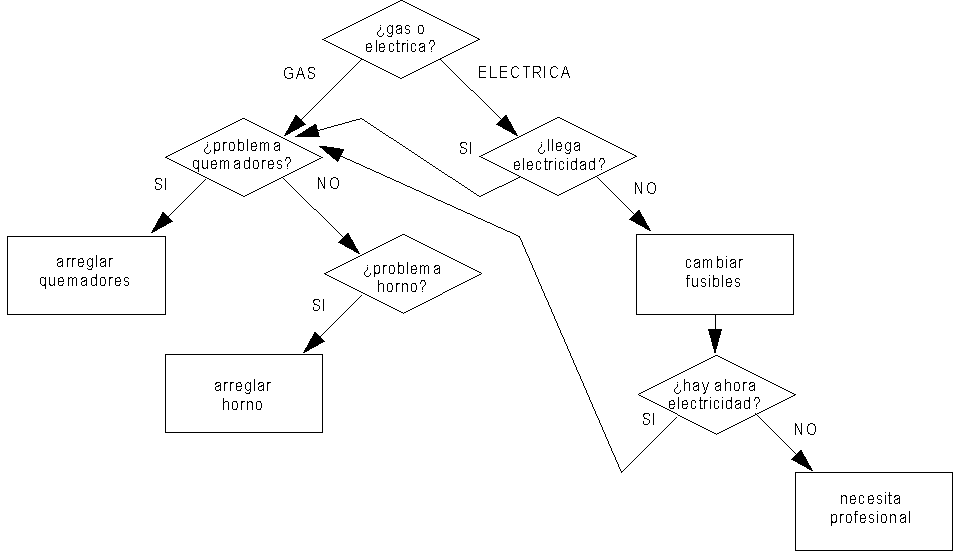

En esta figura, los rectángulos `[arreglar quemadores]` y `[arreglar horno]` dan lugar a árboles de decisión propios, que guían al usuario en el proceso de repararlos. La figura está simplificada, pues debemos hacer distinción entre quemadores y hornos de gas y eléctricos, habiendo un árbol de reparación para cada uno; es decir, 4 en total, que analizamos a continuación.

### Horno y quemadores de gas.

El proceso de reparación del horno de gas es simple, bastando con la información que aporta la figura:

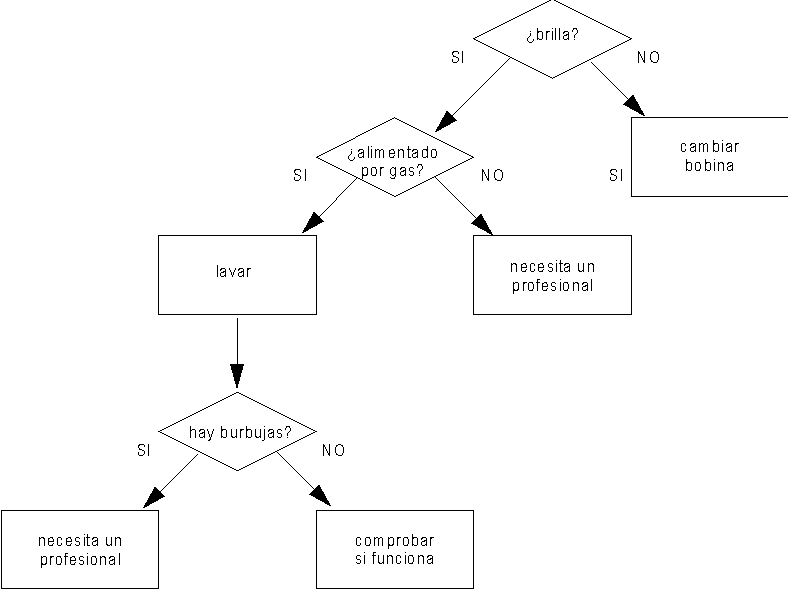

Ocurre lo mismo con el árbol de reparación de los quemadores de gas:

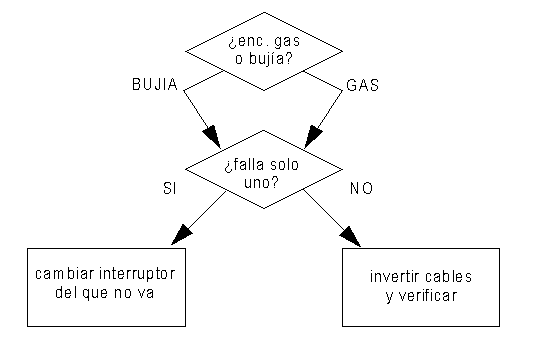

### Horno eléctrico.

Para el horno eléctrico, se muestra el siguiente árbol:

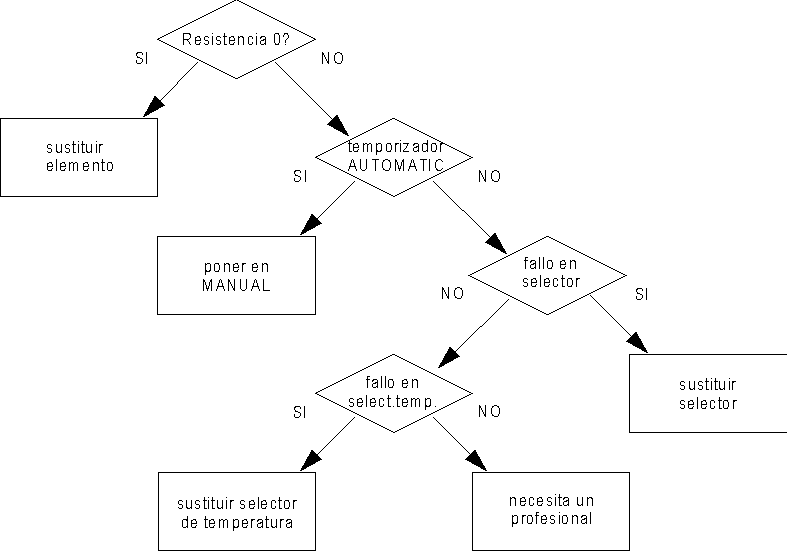

Esta figura también está parcialmente simplificada, concretamente en las decisiones condicionales de `fallo en selector` y `fallo en selector de temperatura`, que en realidad están compuestas de varias preguntas, relacionadas con el funcionamiento eléctrico de cada uno de los selectores. Puesto que el objetivo de todas esas preguntas es determinar si existe algún fallo en uno de ellos, las hemos comprimido en una sola pregunta para cada uno.

### Quemadores eléctricos.

Para los quemadores eléctricos, se da el árbol de decisión más grande, compuesto por:

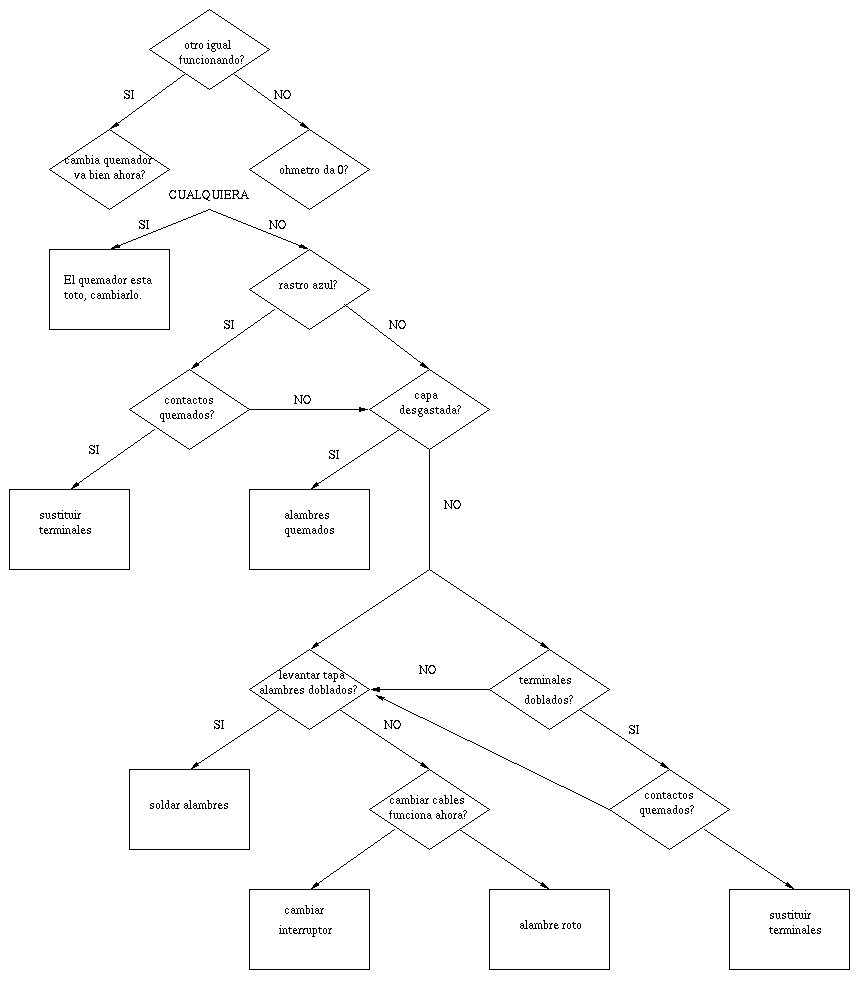

En este esquema, nótese la decisión dada por la pregunta `¿capa desgastada?`, cuya rama por `NO` se divide en 2 hacia 2 preguntas. Esto quiere decir que se elige una de ellas dependiendo de la respuesta que se da al principio sobre las el tipo de tapa de los quemadores: insertada o atornillada. Esta respuesta ocurre al principio, pero lo hemos mostrado así para evitar una mayor complejidad del árbol de decisiones.